# Lab: Data Prrprocessing

We are going preprocess the data set: heart_disease.csv.<br/>
Attribute Information:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)


In [18]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Read data set heart_disease.csv
# column name: 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df = pd.read_csv('heart_disease.csv')

## Display the column names

In [20]:
# Type your code here:
df.columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,typical angina,145.0,233.0,True,2.0,150.0,no,2.3,downsloping,0.0,6.0,0
1,67.0,male,asympomatic,160.0,286.0,False,2.0,108.0,yes,1.5,flat,3.0,3.0,2
2,67.0,male,asympomatic,120.0,229.0,False,2.0,129.0,yes,2.6,flat,2.0,7.0,1
3,37.0,male,non-anginal pain,130.0,250.0,False,0.0,187.0,no,3.5,downsloping,0.0,3.0,0
4,41.0,female,atypical angina,130.0,204.0,False,2.0,172.0,no,1.4,upsloping,0.0,3.0,0


## Display the three columns: age, fbs, and slope


In [21]:
# Type your code here:
df[['age', 'fbs', 'slope']]

,age,fbs,slope
0,63.0,True,downsloping
1,67.0,False,flat
2,67.0,False,flat
3,37.0,False,downsloping
4,41.0,False,upsloping
...,...,...,...
299,68.0,True,flat
300,57.0,False,flat
301,57.0,False,flat
302,38.0,False,upsloping


## Missing Values

In [22]:
# Check if there is any missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       304 non-null    float64
 1   sex       304 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  304 non-null    float64
 4   chol      304 non-null    float64
 5   fbs       304 non-null    bool   
 6   restecg   304 non-null    float64
 7   thalach   304 non-null    float64
 8   exang     304 non-null    object 
 9   oldpeak   304 non-null    float64
 10  slope     304 non-null    object 
 11  ca        304 non-null    object 
 12  thal      304 non-null    object 
 13  num       304 non-null    int64  
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 31.3+ KB


In [23]:
# Remove the row that has missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 33.4+ KB


## Outliers

### Histogram:

<AxesSubplot:>

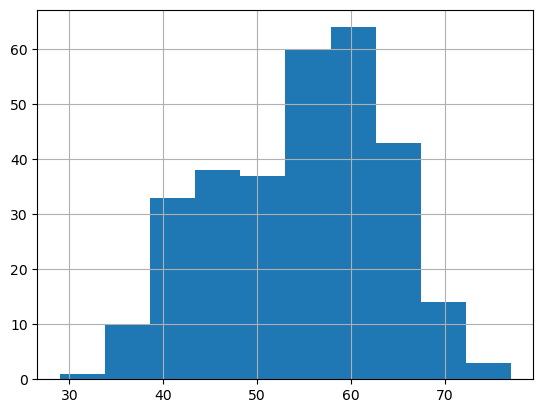

In [24]:
# Type your code here:
df['age'].hist()

In [25]:
df2 = df[df['age'] > 33]

### Boxplot

0.25    133.5
0.75    166.0
Name: thalach, dtype: float64
133.5 166.0
[71.0]


<AxesSubplot:xlabel='thalach'>

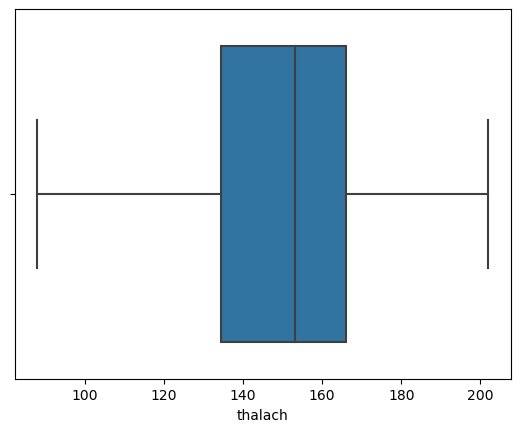

In [26]:
# Use the box plot method to detect if there is any outlies in the thalach feature

print (df.thalach.quantile(q=[0.25, 0.75]))
q1 = np.quantile (df['thalach'], 0.25)
q3 = np.quantile (df['thalach'], 0.75)
print (q1, q3)
iqr = q3 - q1
 
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

outlier = []
for d in df['thalach']:
    if d < lower_limit or d > upper_limit: outlier.append (d)
print (outlier)
if outlier != []:
    for d in outlier:
        df2 = df [df['thalach'] != d]
        
import seaborn as sns
sns.boxplot (x=df2['thalach'])



### Standard deviation

In [27]:
# Use the standard deviation method to detect if there is any outlies in the thalach feature
def find_anomalies(dataColumn):
    #define a list to accumlate anomalies
    outliers = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = dataColumn.std()
    data_mean = dataColumn.mean()
    outlier_cut_off = data_std * 3
    
    lower_limit  = data_mean - outlier_cut_off 
    upper_limit = data_mean + outlier_cut_off

    # Generate outliers
    for outlier in dataColumn:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
    return outliers

outliers = find_anomalies(df['thalach'])
print('outliers=', outliers)
if outliers != []:
    for d in outliers:
        df2 = df [df['thalach'] != d]


outliers= [71.0]


## Scale features:

In [28]:
# scale the features age, trestbps, thalach, chol using the min-max scaling method.
X = df2[['age', 'trestbps', 'thalach', 'chol']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform (X)

In [29]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,typical angina,145.0,233.0,True,2.0,150.0,no,2.3,downsloping,0.0,6.0,0
1,67.0,male,asympomatic,160.0,286.0,False,2.0,108.0,yes,1.5,flat,3.0,3.0,2
2,67.0,male,asympomatic,120.0,229.0,False,2.0,129.0,yes,2.6,flat,2.0,7.0,1
3,37.0,male,non-anginal pain,130.0,250.0,False,0.0,187.0,no,3.5,downsloping,0.0,3.0,0
4,41.0,female,atypical angina,130.0,204.0,False,2.0,172.0,no,1.4,upsloping,0.0,3.0,0


# Encode Categorical features:

In [30]:
# Encode the sex feature as numbers using nominal categorical data
df2 = pd.get_dummies (df2, columns=['sex'])
df2.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex_female,sex_male
0,63.0,typical angina,145.0,233.0,True,2.0,150.0,no,2.3,downsloping,0.0,6.0,0,0,1
1,67.0,asympomatic,160.0,286.0,False,2.0,108.0,yes,1.5,flat,3.0,3.0,2,0,1
2,67.0,asympomatic,120.0,229.0,False,2.0,129.0,yes,2.6,flat,2.0,7.0,1,0,1
3,37.0,non-anginal pain,130.0,250.0,False,0.0,187.0,no,3.5,downsloping,0.0,3.0,0,0,1
4,41.0,atypical angina,130.0,204.0,False,2.0,172.0,no,1.4,upsloping,0.0,3.0,0,1,0


In [31]:
# Encode the cp feature as numbers using ordinal categorical data
from sklearn.preprocessing import LabelEncoder
f = list (np.unique(df2['cp']))

le = LabelEncoder()
le.fit (f)

df3 = df2.join (pd.DataFrame(le.transform(df2['cp']), columns = ['num_cp']))
df3.drop (columns = ['cp'], axis=0, inplace=True)
df3.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex_female,sex_male,num_cp
0,63.0,145.0,233.0,True,2.0,150.0,no,2.3,downsloping,0.0,6.0,0,0,1,3.0
1,67.0,160.0,286.0,False,2.0,108.0,yes,1.5,flat,3.0,3.0,2,0,1,0.0
2,67.0,120.0,229.0,False,2.0,129.0,yes,2.6,flat,2.0,7.0,1,0,1,0.0
3,37.0,130.0,250.0,False,0.0,187.0,no,3.5,downsloping,0.0,3.0,0,0,1,2.0
4,41.0,130.0,204.0,False,2.0,172.0,no,1.4,upsloping,0.0,3.0,0,1,0,1.0


In [32]:
# Encode the fbs feature as numbers using ordinal categorical data
f = list (np.unique(df3['fbs']))

le = LabelEncoder()
le.fit (f)

df3 = df3.join (pd.DataFrame(le.transform(df3['fbs']), columns = ['num_fbs']))
df3.drop (columns = ['fbs'], axis=0, inplace=True)
df3.head()

,age,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex_female,sex_male,num_cp,num_fbs
0,63.0,145.0,233.0,2.0,150.0,no,2.3,downsloping,0.0,6.0,0,0,1,3.0,1.0
1,67.0,160.0,286.0,2.0,108.0,yes,1.5,flat,3.0,3.0,2,0,1,0.0,0.0
2,67.0,120.0,229.0,2.0,129.0,yes,2.6,flat,2.0,7.0,1,0,1,0.0,0.0
3,37.0,130.0,250.0,0.0,187.0,no,3.5,downsloping,0.0,3.0,0,0,1,2.0,0.0
4,41.0,130.0,204.0,2.0,172.0,no,1.4,upsloping,0.0,3.0,0,1,0,1.0,0.0


In [33]:
# Encode the exang feature as numbers using ordinal categorical data
f = list (np.unique(df3['exang']))

le = LabelEncoder()
le.fit (f)

df3 = df3.join (pd.DataFrame(le.transform(df3['exang']), columns = ['num_exang']))
df3.drop (columns = ['exang'], axis=0, inplace=True)
df3.head()

,age,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,num,sex_female,sex_male,num_cp,num_fbs,num_exang
0,63.0,145.0,233.0,2.0,150.0,2.3,downsloping,0.0,6.0,0,0,1,3.0,1.0,0.0
1,67.0,160.0,286.0,2.0,108.0,1.5,flat,3.0,3.0,2,0,1,0.0,0.0,1.0
2,67.0,120.0,229.0,2.0,129.0,2.6,flat,2.0,7.0,1,0,1,0.0,0.0,1.0
3,37.0,130.0,250.0,0.0,187.0,3.5,downsloping,0.0,3.0,0,0,1,2.0,0.0,0.0
4,41.0,130.0,204.0,2.0,172.0,1.4,upsloping,0.0,3.0,0,1,0,1.0,0.0,0.0


In [34]:
# Encode the slope feature as numbers using nominal categorical data
e = pd.get_dummies (df3, columns=['slope'])
e.head()

,age,trestbps,chol,restecg,thalach,oldpeak,ca,thal,num,sex_female,sex_male,num_cp,num_fbs,num_exang,slope_downsloping,slope_flat,slope_upsloping
0,63.0,145.0,233.0,2.0,150.0,2.3,0.0,6.0,0,0,1,3.0,1.0,0.0,1,0,0
1,67.0,160.0,286.0,2.0,108.0,1.5,3.0,3.0,2,0,1,0.0,0.0,1.0,0,1,0
2,67.0,120.0,229.0,2.0,129.0,2.6,2.0,7.0,1,0,1,0.0,0.0,1.0,0,1,0
3,37.0,130.0,250.0,0.0,187.0,3.5,0.0,3.0,0,0,1,2.0,0.0,0.0,1,0,0
4,41.0,130.0,204.0,2.0,172.0,1.4,0.0,3.0,0,1,0,1.0,0.0,0.0,0,0,1
